In [84]:
from pathlib import Path
import pandas as pd
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [339]:
sample = [1,2,3]
train_test = "training"

In [345]:
sample = [4]
train_test = "valid"

In [347]:
sample = [5,6]
train_test = "testing"

In [335]:
color_dic = {
    "background":((0,0,0),(75,75,75)),
    "healthy_cortex":((180,0,0),(255,75,75)),
    "damaged_cortex":((0,0,180),(75,75,255)),
    "hippocampal_region":((0,180,0),(75,255,75)),
    "Dentate_gyrus":((180,180,0),(255,255,75)),
    "thalamus":((0,180,180),(75,255,255)),
    "cerebral_nuclei":((180,0,180),(255,75,255)),
    "corpus_callosum":((75,0,0),(180,75,75)),
    "fornix":((0,75,0),(75,180,75)),
    "lateral_ventricle":((0,0,75),(75,75,180)),
    "anterior_commissure":((75,75,0),(180,180,75)),
    "medial_habenula":((75,0,75),(180,75,180)),
    "lateral_habenula":((0,75,75),(75,180,180))
}

In [122]:
color_dic = {
    "background":[0,0,0],
    "healthy_cortex":[255,0,0],
    "damaged_cortex":[0,0,255],
    "hippocampal_region":[0,255,0],
    "Dentate_gyrus":[255,255,0],
    "thalamus":[0,255,255],
    "cerebral_nuclei":[255,0,255],
    "corpus_callosum":[128,0,0],
    "fornix":[0,128,0],
    "lateral_ventricle":[0,0,128],
    "anterior_commissure":[128,128,0],
    "medial_habenula":[128,0,128],
    "lateral_habenula":[0,128,128]
}
crop_size = 40
target_size = 320

In [340]:
BASE_PATH = Path("/30days/uqxtan9/unet/")

In [348]:
### annotation
for i in sample:
    SPATIAL_PATH = BASE_PATH / "spot_info" / "spot_data-selection-CY3_Sample{}_all.tsv".format(i)
    HE_PATH = BASE_PATH / "images" / "HE_Sample{}.jpg".format(i)
    ANNO_PATH = BASE_PATH / "images" / "anno_Sample{}.jpg".format(i)
    anno_img = cv2.imread(str(ANNO_PATH))
    anno_img = cv2.cvtColor(anno_img, cv2.COLOR_BGR2RGB)
    
    mask = np.zeros(anno_img.shape, dtype=np.uint8)
    for j, key in enumerate(color_dic):
        mask_ = cv2.inRange(anno_img, color_dic[key][0], color_dic[key][1])
        mask[np.where((mask_ == 255))] = [j,j,j]
    anno_mask_img_folder = BASE_PATH / "{}_dataset_anno".format(train_test)
    anno_mask_img_folder.mkdir(parents=True, exist_ok=True)
    anno_mask_img = Image.fromarray(mask)
    print(anno_mask_img.size)
    anno_mask_img.save(BASE_PATH / anno_mask_img_folder / "anno_Sample{}.png".format(i))
    spot_info_df = pd.read_csv(SPATIAL_PATH,sep="\t")
    for imagerow, imagecol in zip(spot_info_df["pixel_x"], spot_info_df["pixel_y"]):
        out_path = BASE_PATH / "{}_dataset_anno_tile".format(train_test)
        out_path.mkdir(parents=True, exist_ok=True)
        imagerow_down = imagerow - crop_size / 2
        imagerow_up = imagerow + crop_size / 2
        imagecol_left = imagecol - crop_size / 2
        imagecol_right = imagecol + crop_size / 2
        tile = anno_mask_img.crop(
            (imagecol_left, imagerow_down, imagecol_right, imagerow_up))
        tile = tile.resize((target_size, target_size),Image.NEAREST)
        tile_name = "Sample" + str(i) + "_" + str(imagecol) + '-' + str(imagerow)
        out_tile = out_path / (tile_name + '.png')

        print("generate tile at location ({}, {})".format(
                str(imagecol), str(imagerow)))
        tile.save(out_tile, 'PNG')
        
        he_img = Image.open(HE_PATH)
        out_path = BASE_PATH / "{}_dataset_he_tile".format(train_test)
        out_path.mkdir(parents=True, exist_ok=True)
        
        tile = he_img.crop(
            (imagecol_left, imagerow_down, imagecol_right, imagerow_up))
        tile = tile.resize((target_size, target_size),Image.NEAREST)
        tile_name = "Sample" + str(i) + "_" + str(imagecol) + '-' + str(imagerow)
        out_tile = out_path / (tile_name + '.png')

        print("generate tile at location ({}, {})".format(
                str(imagecol), str(imagerow)))
        tile.save(out_tile, 'PNG')

(1851, 1788)
generate tile at location (476.8, 387.4)
generate tile at location (476.8, 387.4)
generate tile at location (516.6, 387.8)
generate tile at location (516.6, 387.8)
generate tile at location (554.2, 384.9)
generate tile at location (554.2, 384.9)
generate tile at location (595.0, 388.8)
generate tile at location (595.0, 388.8)
generate tile at location (633.0, 385.0)
generate tile at location (633.0, 385.0)
generate tile at location (672.5, 385.6)
generate tile at location (672.5, 385.6)
generate tile at location (712.2, 388.5)
generate tile at location (712.2, 388.5)
generate tile at location (752.4, 389.2)
generate tile at location (752.4, 389.2)
generate tile at location (789.7, 384.7)
generate tile at location (789.7, 384.7)
generate tile at location (831.6, 381.8)
generate tile at location (831.6, 381.8)
generate tile at location (871.8, 382.7)
generate tile at location (871.8, 382.7)
generate tile at location (911.0, 383.0)
generate tile at location (911.0, 383.0)
gen

generate tile at location (1105.4, 545.5)
generate tile at location (1141.9, 541.7)
generate tile at location (1141.9, 541.7)
generate tile at location (1180.5, 544.1)
generate tile at location (1180.5, 544.1)
generate tile at location (1223.4, 546.1)
generate tile at location (1223.4, 546.1)
generate tile at location (1263.1, 543.1)
generate tile at location (1263.1, 543.1)
generate tile at location (471.0, 584.2)
generate tile at location (471.0, 584.2)
generate tile at location (509.9, 584.2)
generate tile at location (509.9, 584.2)
generate tile at location (549.9, 584.2)
generate tile at location (549.9, 584.2)
generate tile at location (588.0, 584.2)
generate tile at location (588.0, 584.2)
generate tile at location (629.3, 584.2)
generate tile at location (629.3, 584.2)
generate tile at location (668.6, 584.2)
generate tile at location (668.6, 584.2)
generate tile at location (706.4, 581.9)
generate tile at location (706.4, 581.9)
generate tile at location (746.0, 584.2)
generat

generate tile at location (865.3, 740.2)
generate tile at location (907.4, 739.8)
generate tile at location (907.4, 739.8)
generate tile at location (948.9, 740.5)
generate tile at location (948.9, 740.5)
generate tile at location (986.6, 740.7)
generate tile at location (986.6, 740.7)
generate tile at location (1024.5, 740.2)
generate tile at location (1024.5, 740.2)
generate tile at location (1066.1, 740.5)
generate tile at location (1066.1, 740.5)
generate tile at location (1103.3, 740.2)
generate tile at location (1103.3, 740.2)
generate tile at location (1141.2, 740.2)
generate tile at location (1141.2, 740.2)
generate tile at location (431.4, 774.8)
generate tile at location (431.4, 774.8)
generate tile at location (471.0, 779.0)
generate tile at location (471.0, 779.0)
generate tile at location (508.3, 774.4)
generate tile at location (508.3, 774.4)
generate tile at location (551.3, 776.5)
generate tile at location (551.3, 776.5)
generate tile at location (589.9, 776.9)
generate

generate tile at location (905.0, 979.2)
generate tile at location (946.1, 980.1)
generate tile at location (946.1, 980.1)
generate tile at location (984.7, 979.2)
generate tile at location (984.7, 979.2)
generate tile at location (1023.5, 979.5)
generate tile at location (1023.5, 979.5)
generate tile at location (1061.0, 980.8)
generate tile at location (1061.0, 980.8)
generate tile at location (668.6, 1017.9)
generate tile at location (668.6, 1017.9)
generate tile at location (705.2, 1017.9)
generate tile at location (705.2, 1017.9)
generate tile at location (747.7, 1016.4)
generate tile at location (747.7, 1016.4)
generate tile at location (786.7, 1022.7)
generate tile at location (786.7, 1022.7)
generate tile at location (827.2, 1017.0)
generate tile at location (827.2, 1017.0)
generate tile at location (865.3, 1017.9)
generate tile at location (865.3, 1017.9)
generate tile at location (902.7, 1015.1)
generate tile at location (902.7, 1015.1)
generate tile at location (944.7, 1017.

generate tile at location (1178.7, 1251.6)
generate tile at location (1221.7, 1255.1)
generate tile at location (1221.7, 1255.1)
generate tile at location (1258.7, 1257.7)
generate tile at location (1258.7, 1257.7)
generate tile at location (552.0, 1290.8)
generate tile at location (552.0, 1290.8)
generate tile at location (588.8, 1290.5)
generate tile at location (588.8, 1290.5)
generate tile at location (627.8, 1290.4)
generate tile at location (627.8, 1290.4)
generate tile at location (667.6, 1290.7)
generate tile at location (667.6, 1290.7)
generate tile at location (705.2, 1290.8)
generate tile at location (705.2, 1290.8)
generate tile at location (746.0, 1290.9)
generate tile at location (746.0, 1290.9)
generate tile at location (787.7, 1296.7)
generate tile at location (787.7, 1296.7)
generate tile at location (825.8, 1290.8)
generate tile at location (825.8, 1290.8)
generate tile at location (865.3, 1290.8)
generate tile at location (865.3, 1290.8)
generate tile at location (90

generate tile at location (624.4, 1528.7)
generate tile at location (668.6, 1529.7)
generate tile at location (668.6, 1529.7)
generate tile at location (703.0, 1529.4)
generate tile at location (703.0, 1529.4)
generate tile at location (746.0, 1529.7)
generate tile at location (746.0, 1529.7)
generate tile at location (786.7, 1529.7)
generate tile at location (786.7, 1529.7)
generate tile at location (820.7, 1527.6)
generate tile at location (820.7, 1527.6)
generate tile at location (861.6, 1526.9)
generate tile at location (861.6, 1526.9)
generate tile at location (900.4, 1530.8)
generate tile at location (900.4, 1530.8)
generate tile at location (938.7, 1531.5)
generate tile at location (938.7, 1531.5)
generate tile at location (984.7, 1529.7)
generate tile at location (984.7, 1529.7)
generate tile at location (1024.5, 1529.7)
generate tile at location (1024.5, 1529.7)
generate tile at location (1135.4, 1532.2)
generate tile at location (1135.4, 1532.2)
generate tile at location (118

generate tile at location (776.4, 437.0)
generate tile at location (812.2, 437.4)
generate tile at location (812.2, 437.4)
generate tile at location (853.6, 436.9)
generate tile at location (853.6, 436.9)
generate tile at location (931.9, 436.9)
generate tile at location (931.9, 436.9)
generate tile at location (977.2, 437.1)
generate tile at location (977.2, 437.1)
generate tile at location (1012.2, 437.8)
generate tile at location (1012.2, 437.8)
generate tile at location (1053.2, 437.6)
generate tile at location (1053.2, 437.6)
generate tile at location (1093.3, 437.4)
generate tile at location (1093.3, 437.4)
generate tile at location (1132.8, 438.8)
generate tile at location (1132.8, 438.8)
generate tile at location (1171.6, 438.7)
generate tile at location (1171.6, 438.7)
generate tile at location (1212.2, 439.0)
generate tile at location (1212.2, 439.0)
generate tile at location (1251.3, 439.2)
generate tile at location (1251.3, 439.2)
generate tile at location (1285.3, 436.9)
g

generate tile at location (615.9, 593.1)
generate tile at location (655.6, 593.1)
generate tile at location (655.6, 593.1)
generate tile at location (696.9, 594.7)
generate tile at location (696.9, 594.7)
generate tile at location (732.4, 587.5)
generate tile at location (732.4, 587.5)
generate tile at location (775.0, 593.1)
generate tile at location (775.0, 593.1)
generate tile at location (817.6, 594.9)
generate tile at location (817.6, 594.9)
generate tile at location (853.6, 591.9)
generate tile at location (853.6, 591.9)
generate tile at location (893.7, 595.1)
generate tile at location (893.7, 595.1)
generate tile at location (931.9, 593.1)
generate tile at location (931.9, 593.1)
generate tile at location (972.1, 593.1)
generate tile at location (972.1, 593.1)
generate tile at location (1013.6, 595.1)
generate tile at location (1013.6, 595.1)
generate tile at location (1051.4, 596.1)
generate tile at location (1051.4, 596.1)
generate tile at location (1093.6, 595.4)
generate ti

generate tile at location (341.2, 750.4)
generate tile at location (380.1, 748.0)
generate tile at location (380.1, 748.0)
generate tile at location (420.8, 750.4)
generate tile at location (420.8, 750.4)
generate tile at location (459.8, 750.4)
generate tile at location (459.8, 750.4)
generate tile at location (500.1, 750.4)
generate tile at location (500.1, 750.4)
generate tile at location (538.7, 750.4)
generate tile at location (538.7, 750.4)
generate tile at location (579.1, 751.3)
generate tile at location (579.1, 751.3)
generate tile at location (615.9, 750.4)
generate tile at location (615.9, 750.4)
generate tile at location (657.8, 749.2)
generate tile at location (657.8, 749.2)
generate tile at location (697.6, 749.0)
generate tile at location (697.6, 749.0)
generate tile at location (729.9, 750.0)
generate tile at location (729.9, 750.0)
generate tile at location (775.0, 750.4)
generate tile at location (775.0, 750.4)
generate tile at location (817.1, 752.0)
generate tile at

generate tile at location (1246.7, 869.9)
generate tile at location (1285.3, 869.9)
generate tile at location (1285.3, 869.9)
generate tile at location (265.2, 907.6)
generate tile at location (265.2, 907.6)
generate tile at location (301.4, 907.6)
generate tile at location (301.4, 907.6)
generate tile at location (340.8, 905.2)
generate tile at location (340.8, 905.2)
generate tile at location (381.3, 907.6)
generate tile at location (381.3, 907.6)
generate tile at location (422.2, 904.6)
generate tile at location (422.2, 904.6)
generate tile at location (458.8, 904.5)
generate tile at location (458.8, 904.5)
generate tile at location (500.6, 906.9)
generate tile at location (500.6, 906.9)
generate tile at location (537.7, 907.6)
generate tile at location (537.7, 907.6)
generate tile at location (576.3, 906.0)
generate tile at location (576.3, 906.0)
generate tile at location (615.9, 907.6)
generate tile at location (615.9, 907.6)
generate tile at location (655.6, 907.6)
generate tile

generate tile at location (1011.9, 1028.8)
generate tile at location (1051.0, 1029.4)
generate tile at location (1051.0, 1029.4)
generate tile at location (1089.9, 1029.6)
generate tile at location (1089.9, 1029.6)
generate tile at location (1130.9, 1030.3)
generate tile at location (1130.9, 1030.3)
generate tile at location (1168.6, 1029.9)
generate tile at location (1168.6, 1029.9)
generate tile at location (1209.4, 1029.9)
generate tile at location (1209.4, 1029.9)
generate tile at location (265.2, 1066.3)
generate tile at location (265.2, 1066.3)
generate tile at location (299.8, 1064.3)
generate tile at location (299.8, 1064.3)
generate tile at location (340.0, 1065.1)
generate tile at location (340.0, 1065.1)
generate tile at location (379.2, 1065.1)
generate tile at location (379.2, 1065.1)
generate tile at location (418.0, 1066.5)
generate tile at location (418.0, 1066.5)
generate tile at location (459.8, 1066.3)
generate tile at location (459.8, 1066.3)
generate tile at locati

generate tile at location (502.0, 1221.7)
generate tile at location (540.8, 1221.7)
generate tile at location (540.8, 1221.7)
generate tile at location (578.8, 1224.0)
generate tile at location (578.8, 1224.0)
generate tile at location (617.1, 1223.5)
generate tile at location (617.1, 1223.5)
generate tile at location (657.5, 1224.0)
generate tile at location (657.5, 1224.0)
generate tile at location (696.0, 1223.6)
generate tile at location (696.0, 1223.6)
generate tile at location (733.0, 1222.2)
generate tile at location (733.0, 1222.2)
generate tile at location (775.0, 1223.5)
generate tile at location (775.0, 1223.5)
generate tile at location (811.3, 1223.5)
generate tile at location (811.3, 1223.5)
generate tile at location (856.2, 1225.8)
generate tile at location (856.2, 1225.8)
generate tile at location (894.6, 1221.7)
generate tile at location (894.6, 1221.7)
generate tile at location (931.9, 1223.5)
generate tile at location (931.9, 1223.5)
generate tile at location (972.0, 

generate tile at location (811.7, 1383.9)
generate tile at location (852.7, 1386.0)
generate tile at location (852.7, 1386.0)
generate tile at location (893.0, 1383.9)
generate tile at location (893.0, 1383.9)
generate tile at location (931.9, 1383.9)
generate tile at location (931.9, 1383.9)
generate tile at location (970.3, 1384.1)
generate tile at location (970.3, 1384.1)
generate tile at location (1010.6, 1383.9)
generate tile at location (1010.6, 1383.9)
generate tile at location (1052.4, 1383.9)
generate tile at location (1052.4, 1383.9)
generate tile at location (1086.9, 1386.2)
generate tile at location (1086.9, 1386.2)
generate tile at location (1207.3, 1385.4)
generate tile at location (1207.3, 1385.4)
generate tile at location (265.2, 1421.8)
generate tile at location (265.2, 1421.8)
generate tile at location (300.5, 1419.5)
generate tile at location (300.5, 1419.5)
generate tile at location (340.5, 1419.7)
generate tile at location (340.5, 1419.7)
generate tile at location 

generate tile at location (1123.7, 1542.7)
generate tile at location (1164.2, 1543.2)
generate tile at location (1164.2, 1543.2)
generate tile at location (1209.4, 1542.9)
generate tile at location (1209.4, 1542.9)
generate tile at location (265.2, 1580.0)
generate tile at location (265.2, 1580.0)
generate tile at location (299.0, 1577.3)
generate tile at location (299.0, 1577.3)
generate tile at location (341.2, 1580.0)
generate tile at location (341.2, 1580.0)
generate tile at location (381.3, 1580.0)
generate tile at location (381.3, 1580.0)
generate tile at location (420.8, 1580.0)
generate tile at location (420.8, 1580.0)
generate tile at location (458.2, 1578.8)
generate tile at location (458.2, 1578.8)
generate tile at location (498.5, 1578.8)
generate tile at location (498.5, 1578.8)
generate tile at location (534.7, 1579.1)
generate tile at location (534.7, 1579.1)
generate tile at location (579.1, 1578.8)
generate tile at location (579.1, 1578.8)
generate tile at location (61

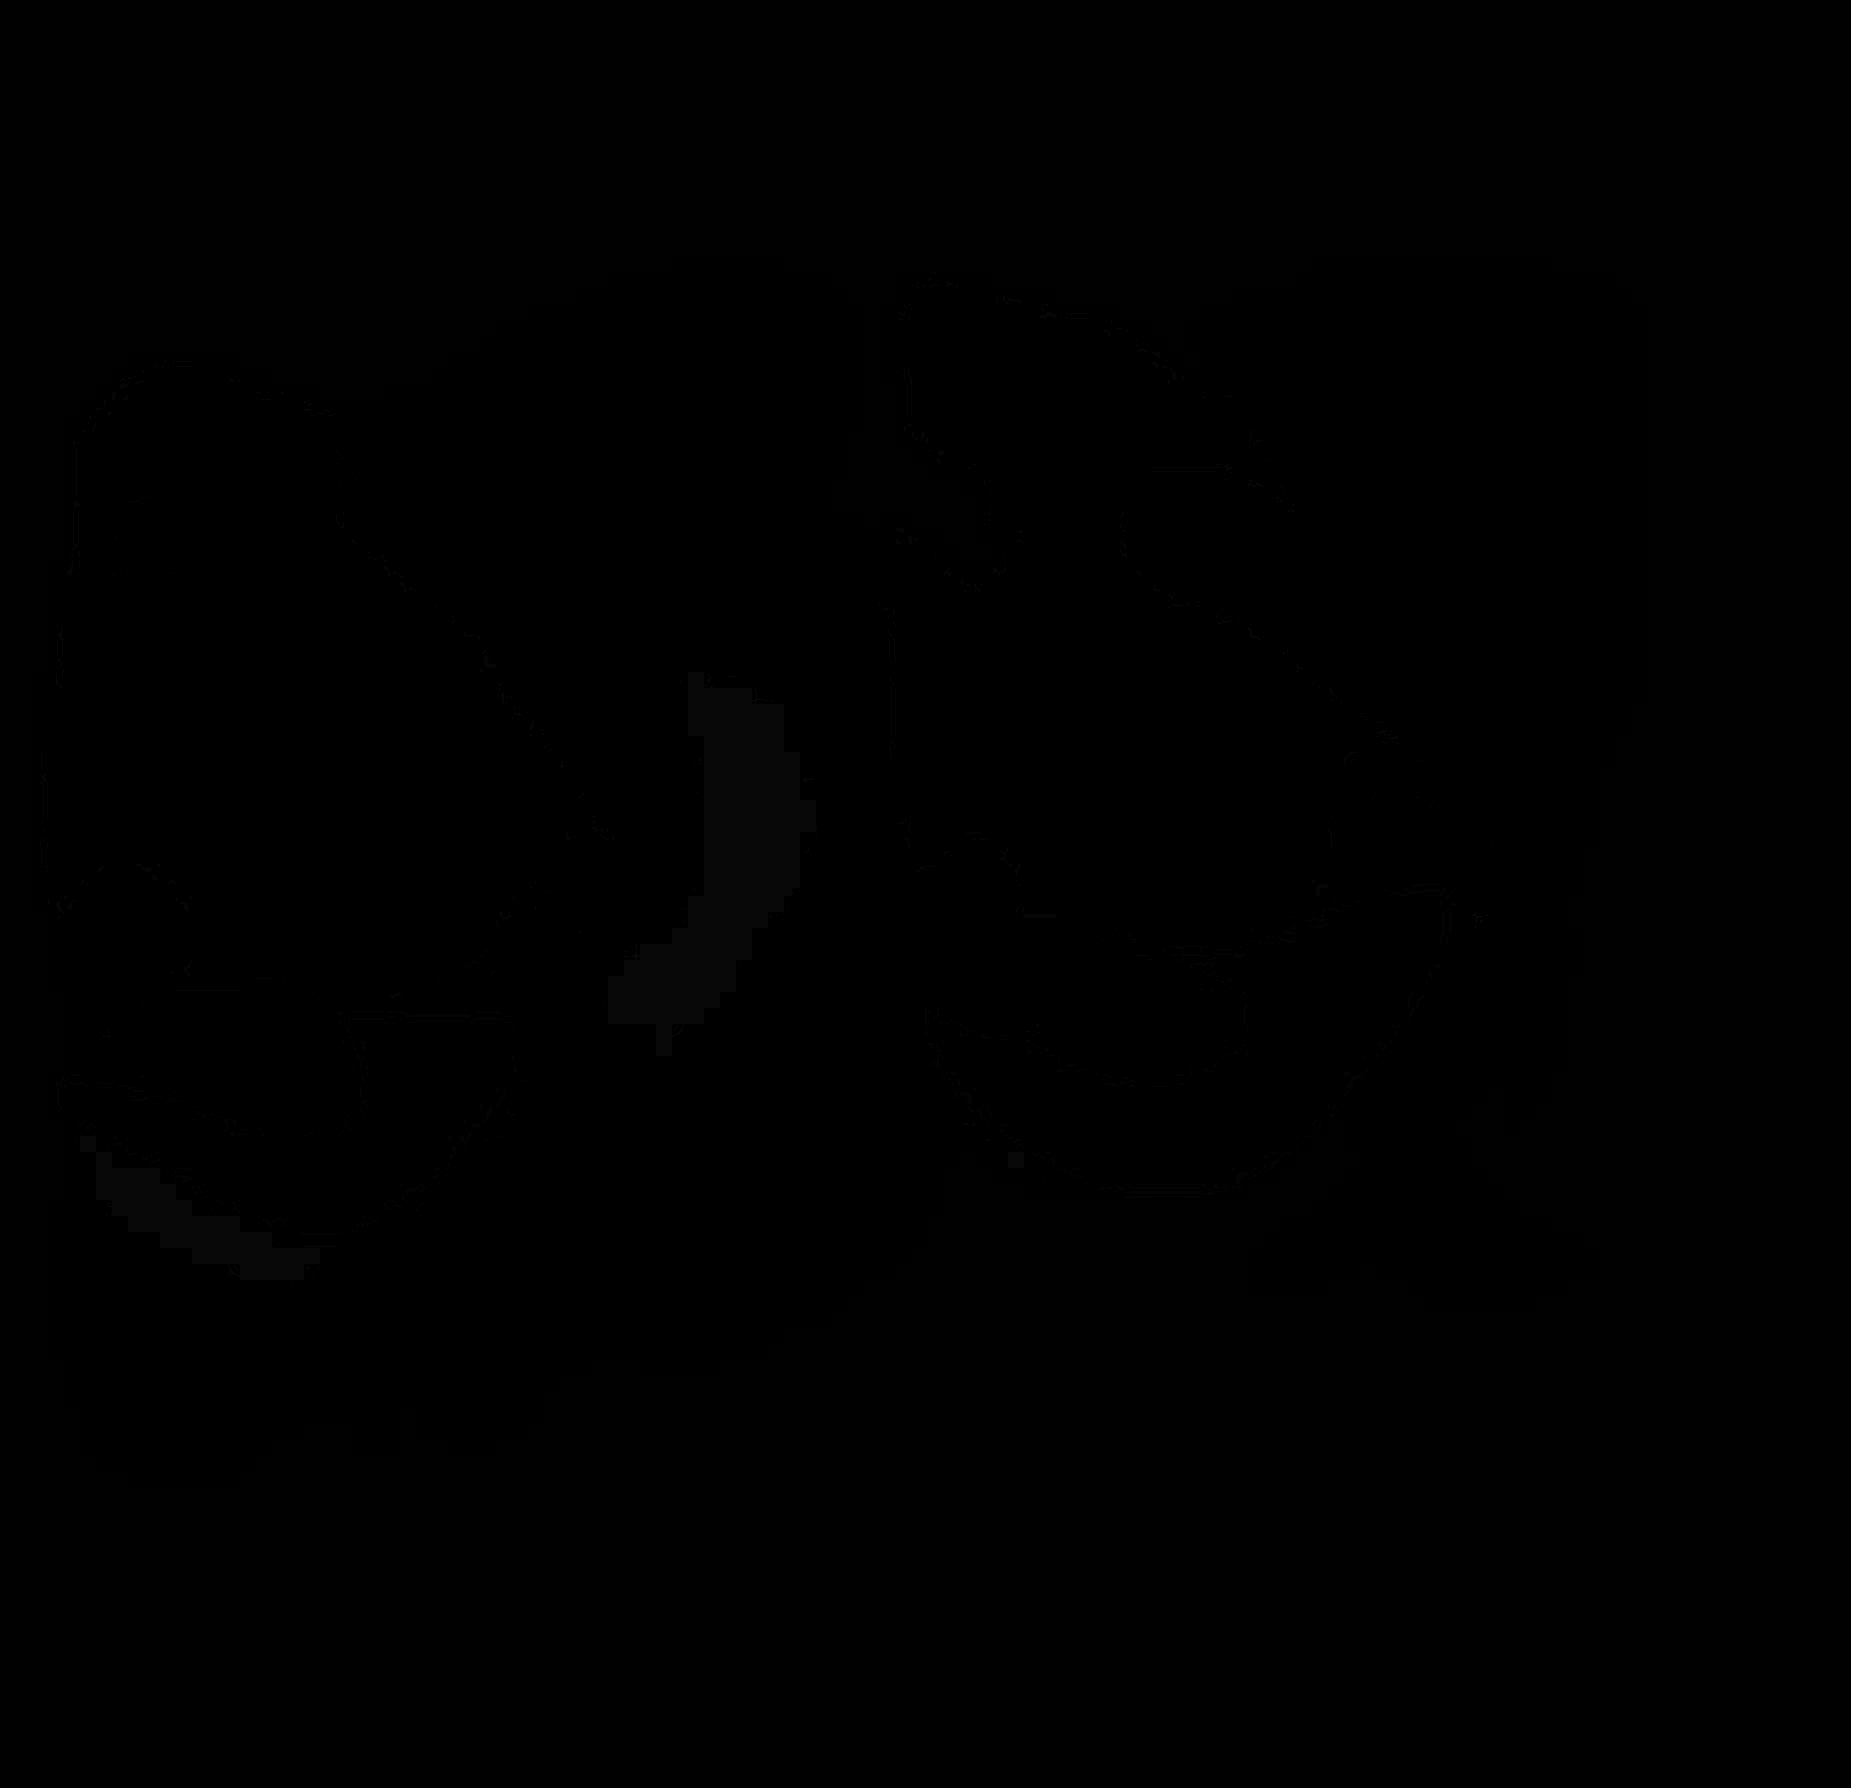

In [125]:
anno_mask_img

In [331]:
### annotation
for i in sample:
    SPATIAL_PATH = BASE_PATH / "spot_info" / "spot_data-selection-CY3_Sample{}_all.tsv".format(i)
    HE_PATH = BASE_PATH / "images" / "HE_Sample{}.jpg".format(i)
    ANNO_PATH = BASE_PATH / "images" / "anno_Sample{}.jpg".format(i)
    anno_img = cv2.imread(str(ANNO_PATH))
    anno_img = cv2.cvtColor(anno_img, cv2.COLOR_BGR2RGB)
    
    mask = np.zeros(anno_img.shape, dtype=np.uint8)
    for j, key in enumerate(color_dic):
        mask_ = cv2.inRange(anno_img, color_dic[key][0], color_dic[key][1])
        mask[np.where((mask_ == 255))] = [j+1,j+1,j+1]
        mask_show = Image.fromarray(mask)
        mask_show

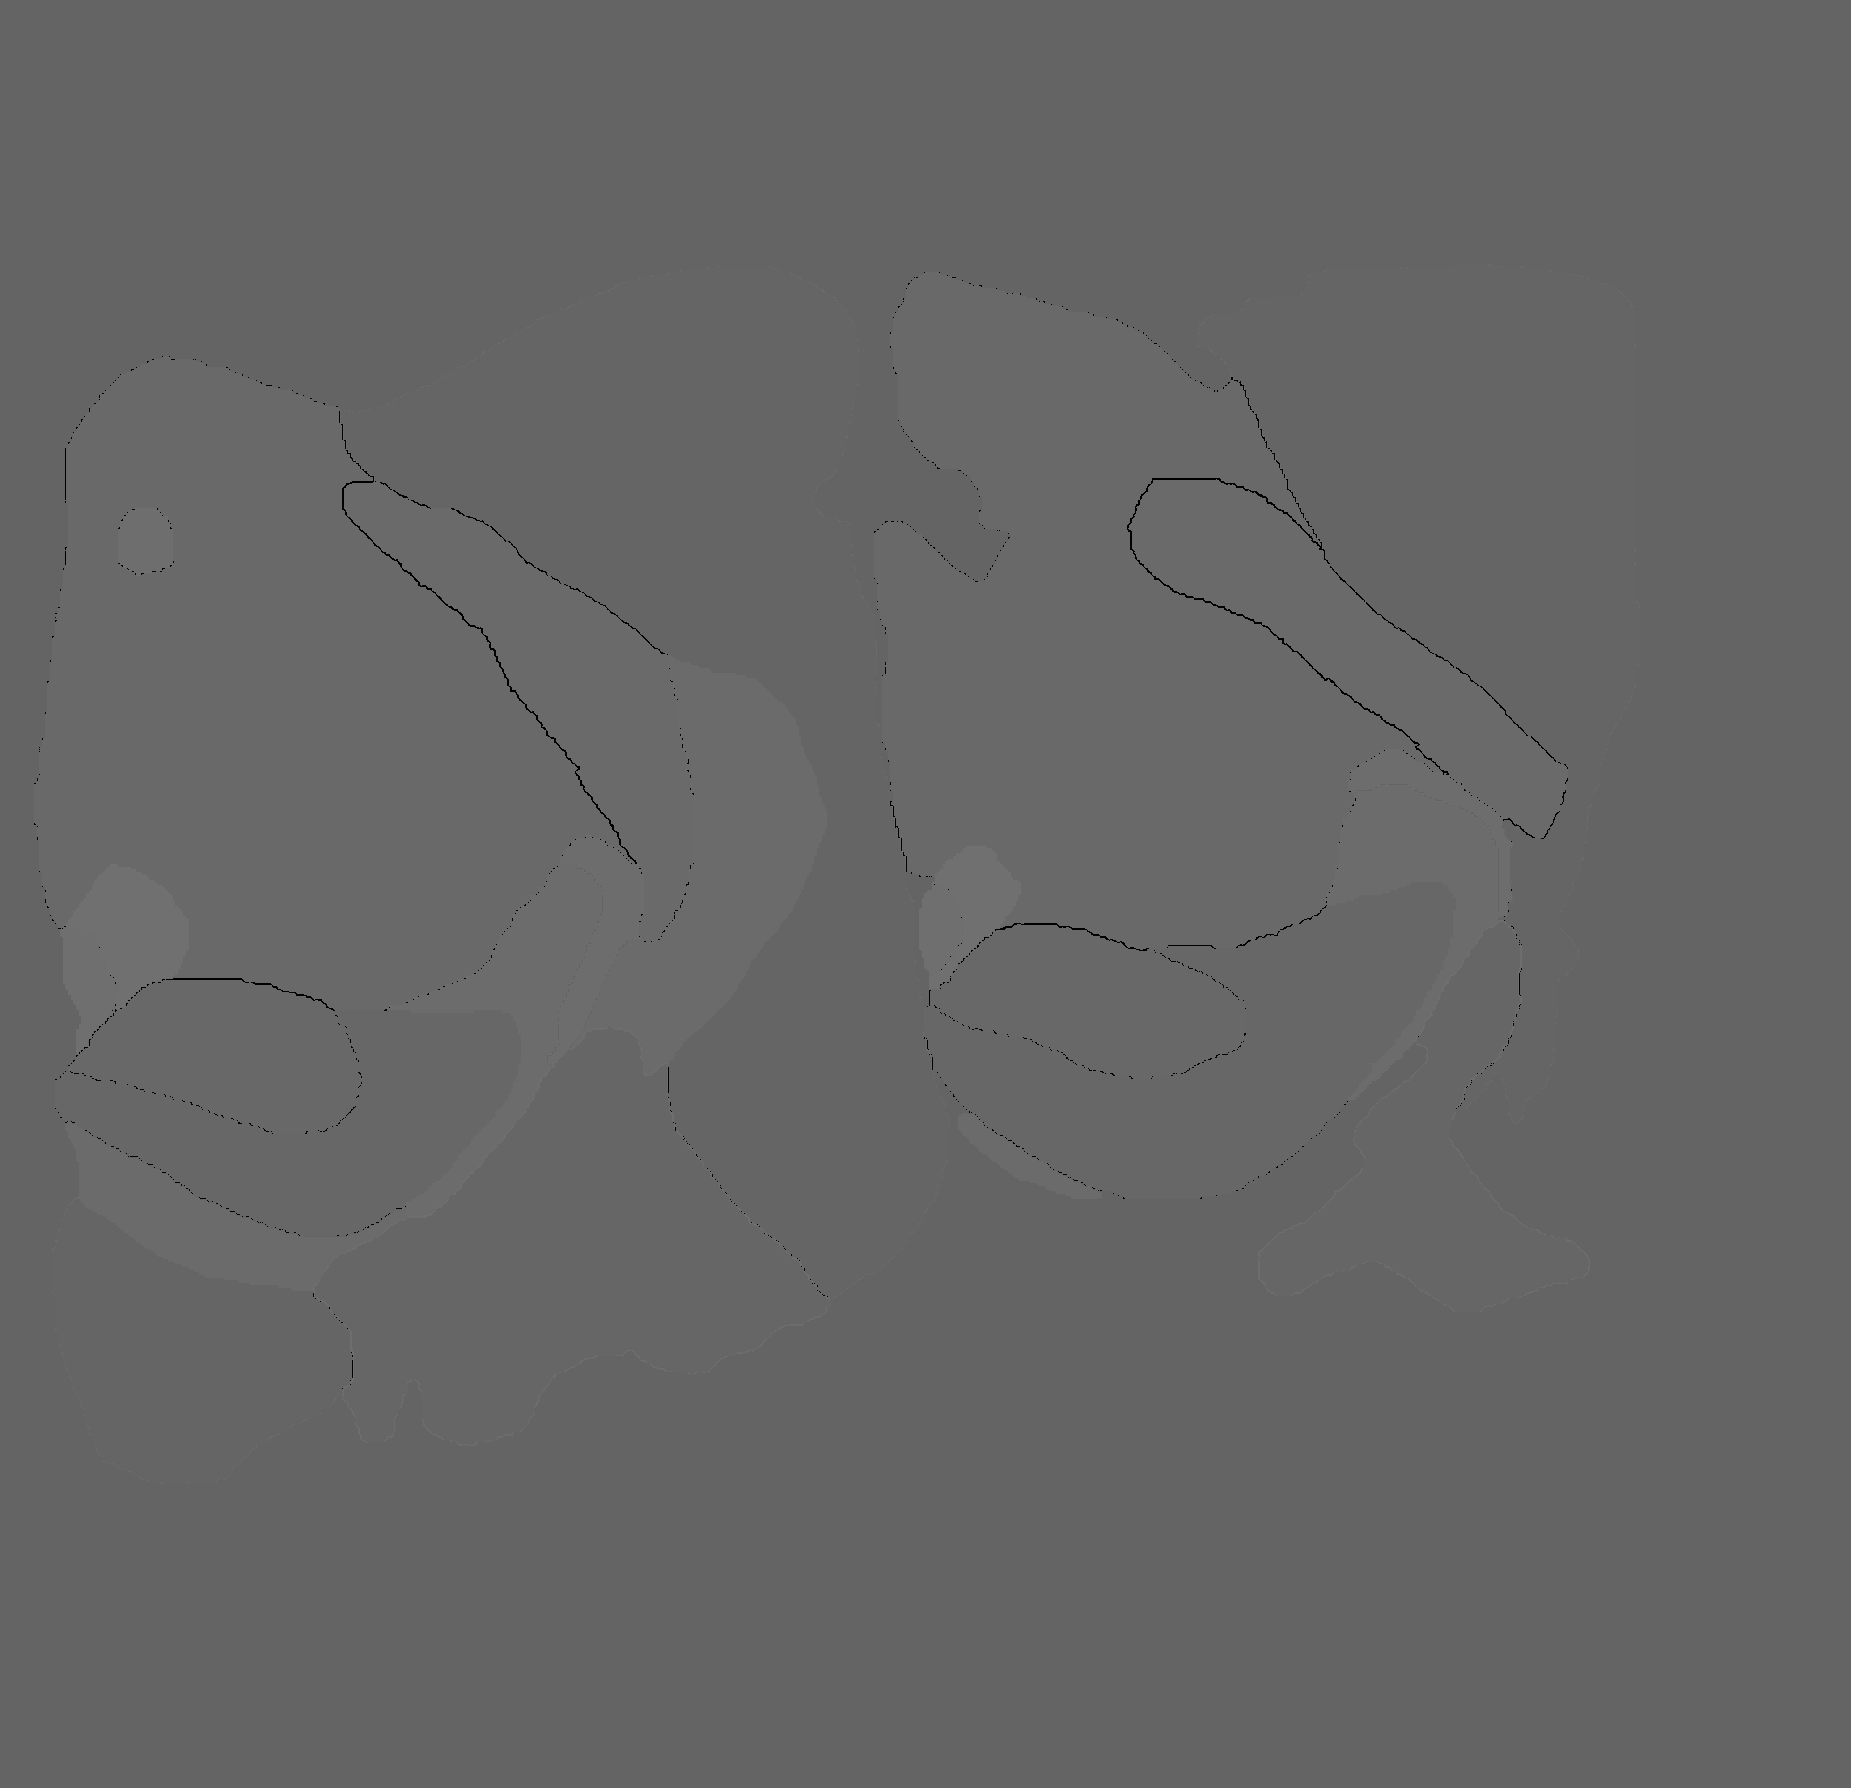

In [332]:
mask_show

In [126]:
i = 1
SPATIAL_PATH = BASE_PATH / "spot_info" / "spot_data-selection-CY3_Sample{}_all.tsv".format(i)
HE_PATH = BASE_PATH / "images" / "HE_Sample{}.jpg".format(i)
ANNO_PATH = BASE_PATH / "images" / "anno_Sample{}.jpg".format(i)

In [312]:
anno_img = cv2.imread(str(ANNO_PATH))

In [313]:
anno_img = cv2.cvtColor(anno_img, cv2.COLOR_BGR2RGB)

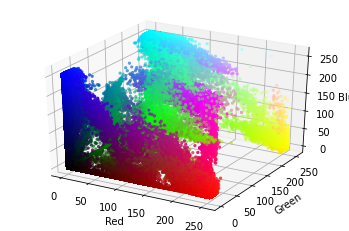

In [234]:
r, g, b = cv2.split(anno_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = anno_img.reshape((np.shape(anno_img)[0]*np.shape(anno_img)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [235]:
anno_img = cv2.cvtColor(anno_img, cv2.COLOR_RGB2HSV)

In [236]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

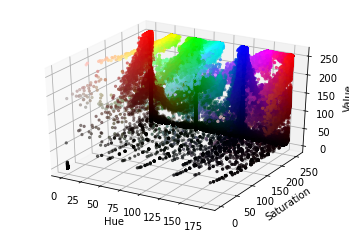

In [237]:
h, s, v = cv2.split(anno_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [241]:
h.max()

179

In [303]:
color_dic = {
    "background":((0,0,0),(180,255,50)),
    "healthy_cortex":((0,0,50), (10,255,255)),
    "damaged_cortex":((100,0,50), (125,255,255)),
    "hippocampal_region":((0,0,50), (1,255,255)),
    "Dentate_gyrus":((0,0,50), (1,255,255)),
    "thalamus":((0,0,50), (1,255,255)),
    "cerebral_nuclei":((0,0,50), (1,255,255)),
    "corpus_callosum":((0,0,50), (1,255,255)),
    "fornix":((0,0,50), (1,255,255)),
    "lateral_ventricle":((0,0,50), (1,255,255)),
    "anterior_commissure":((0,0,50), (1,255,255)),
    "medial_habenula":((0,0,50), (1,255,255)),
    "lateral_habenula":((0,0,50), (1,255,255))
}

In [330]:
color_dic = {
    "background":((0,0,0),(75,75,75)),
    "healthy_cortex":((180,0,0),(255,75,75)),
    "damaged_cortex":((0,0,180),(75,75,255)),
    "hippocampal_region":((0,180,0),(75,255,75)),
    "Dentate_gyrus":((180,180,0),(255,255,75)),
    "thalamus":((0,180,180),(75,255,255)),
    "cerebral_nuclei":((180,0,180),(255,75,255)),
    "corpus_callosum":((75,0,0),(180,75,75)),
    "fornix":((0,75,0),(75,180,75)),
    "lateral_ventricle":((0,0,75),(75,75,180)),
    "anterior_commissure":((75,75,0),(180,180,75)),
    "medial_habenula":((75,0,75),(180,75,180)),
    "lateral_habenula":((0,75,75),(75,180,180))
}

In [221]:
np.unique(anno_img.reshape(-1, anno_img.shape[2]), axis=0).shape

(54818, 3)

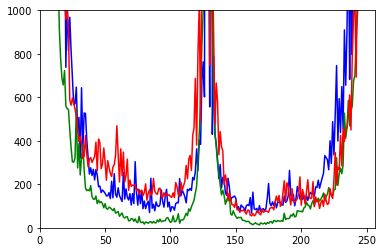

In [225]:
img = cv2.imread(str(ANNO_PATH))
color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    plt.ylim([0,1000])
plt.show()

In [314]:
mask = cv2.inRange(anno_img, color_dic["damaged_cortex"][0], color_dic["damaged_cortex"][1])

In [272]:
mask = mask.astype("int8")

In [274]:
mask = mask /255

In [297]:
mask.shape

(1788, 1851)

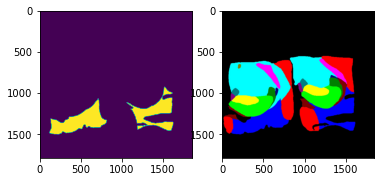

In [315]:
plt.subplot(1, 2, 1)
plt.imshow(mask)
plt.subplot(1, 2, 2)
plt.imshow(anno_img)
plt.show()

In [316]:
mask_ = np.zeros(anno_img.shape, dtype=np.uint8)
mask_[np.where((mask == 255))] = [j+200,j+200,j+200]

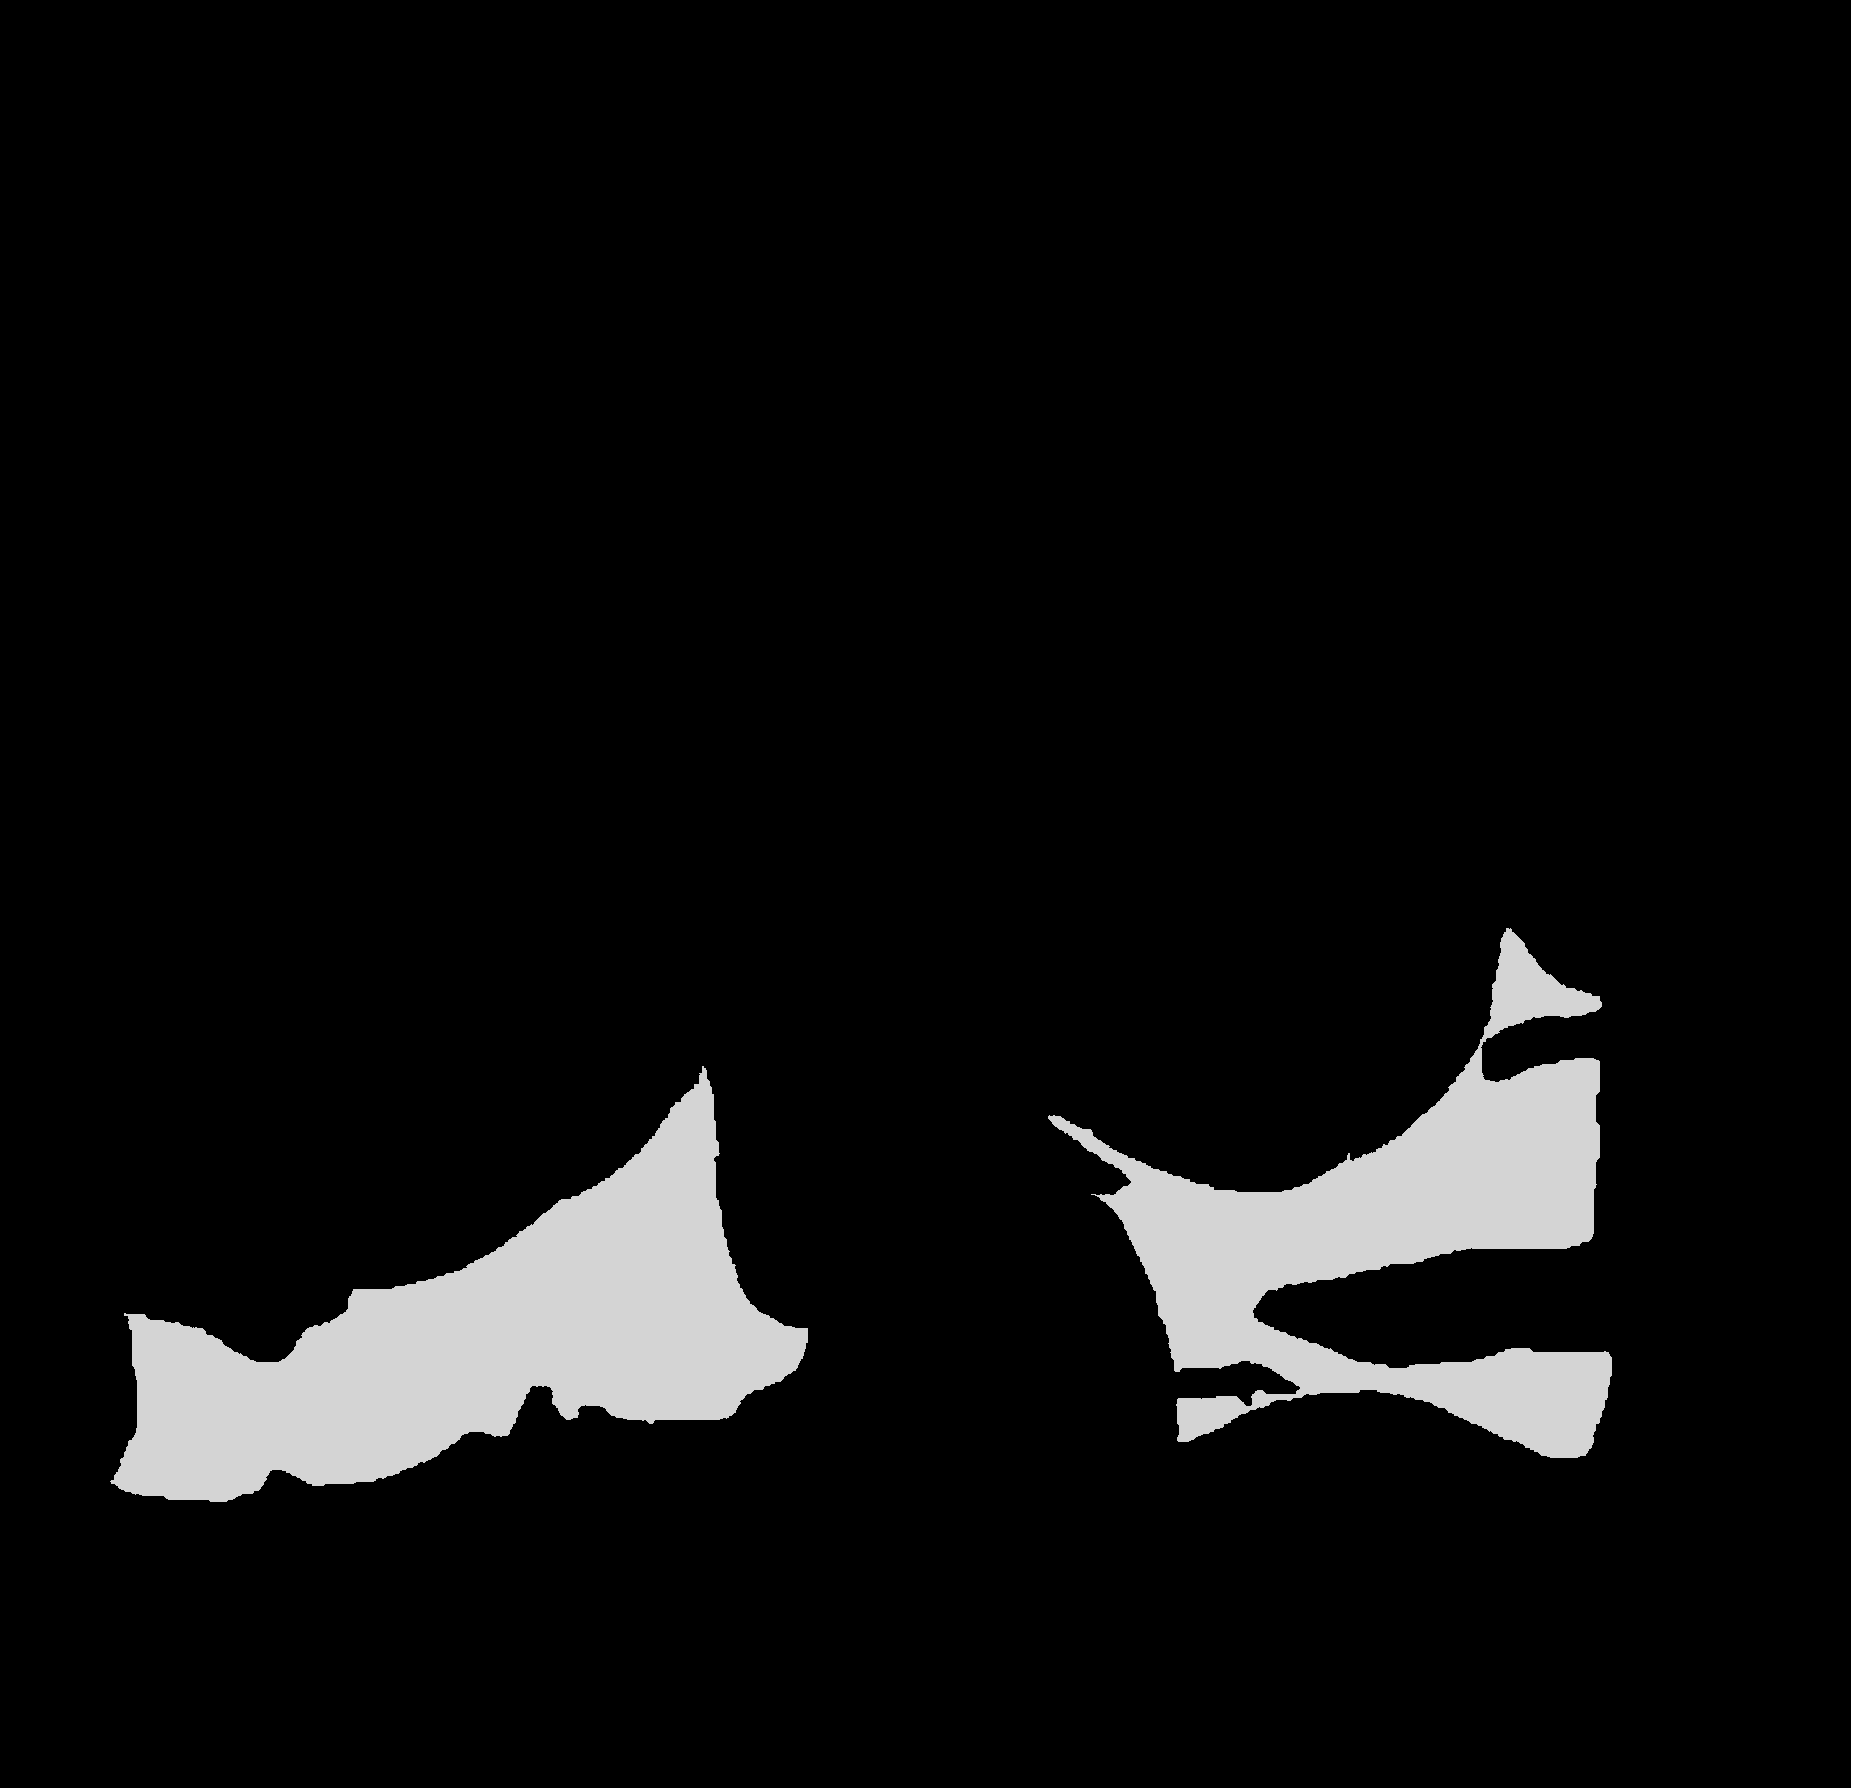

In [317]:
Image.fromarray(mask_)

In [191]:
color_dic[key]

[0, 128, 128]

In [79]:
anno_mask_img_folder = BASE_PATH / "{}_dataset_anno".format(train_test)
anno_mask_img_folder.mkdir(parents=True, exist_ok=True)
anno_mask_img = Image.fromarray(mask)
anno_mask_img.save(BASE_PATH / anno_mask_img_folder / "anno_Sample{}.png".format(i))

In [73]:
spot_info_df = pd.read_csv(SPATIAL_PATH,sep="\t")

In [ ]:
for index, row in spot_info_df.iterrows():
    
    print(row['pixel_x'], row['pixel_y'])

In [77]:
crop_size = 40
target_size = 320
out_path = BASE_PATH / "{}_dataset_anno_tile".format(train_test)
out_path.mkdir(parents=True, exist_ok=True)
for imagerow, imagecol in zip(spot_info_df["pixel_y"], spot_info_df["pixel_x"]):
    imagerow_down = imagerow - crop_size / 2
    imagerow_up = imagerow + crop_size / 2
    imagecol_left = imagecol - crop_size / 2
    imagecol_right = imagecol + crop_size / 2
    tile = anno_mask_img.crop(
        (imagecol_left, imagerow_down, imagecol_right, imagerow_up))
    tile = tile.resize((target_size, target_size),Image.NEAREST)
    tile_name = "Sample" + str(i) + "_" + str(imagecol) + '-' + str(imagerow)
    out_tile = out_path / (tile_name + '.png')

    print("generate tile at location ({}, {})".format(
            str(imagecol), str(imagerow)))
    tile.save(out_tile, 'PNG')

generate tile at location (634.5, 300.9)
generate tile at location (667.9, 299.0)
generate tile at location (713.5, 301.1)
generate tile at location (752.9, 299.0)
generate tile at location (791.9, 298.7)
generate tile at location (831.9, 299.0)
generate tile at location (871.3, 301.8)
generate tile at location (909.7, 299.2)
generate tile at location (949.6, 299.3)
generate tile at location (989.8, 296.9)
generate tile at location (1028.5, 299.7)
generate tile at location (1067.8, 299.8)
generate tile at location (1107.5, 299.8)
generate tile at location (1146.9, 299.8)
generate tile at location (1187.5, 298.3)
generate tile at location (1225.8, 300.3)
generate tile at location (1264.4, 300.6)
generate tile at location (1304.7, 300.7)
generate tile at location (1343.0, 298.1)
generate tile at location (1379.6, 299.7)
generate tile at location (1422.4, 301.1)
generate tile at location (1462.1, 299.0)
generate tile at location (631.5, 335.1)
generate tile at location (667.6, 338.3)
gene

generate tile at location (789.4, 695.3)
generate tile at location (828.9, 690.9)
generate tile at location (868.5, 692.1)
generate tile at location (907.4, 695.3)
generate tile at location (946.2, 695.3)
generate tile at location (984.7, 695.3)
generate tile at location (1025.2, 690.7)
generate tile at location (1064.2, 695.3)
generate tile at location (1104.4, 691.4)
generate tile at location (1144.2, 696.0)
generate tile at location (1183.8, 692.5)
generate tile at location (1222.8, 693.8)
generate tile at location (1260.9, 693.0)
generate tile at location (1303.4, 693.2)
generate tile at location (1339.8, 694.8)
generate tile at location (1381.0, 692.5)
generate tile at location (1416.6, 694.1)
generate tile at location (630.5, 727.8)
generate tile at location (665.3, 728.3)
generate tile at location (710.1, 728.9)
generate tile at location (746.9, 728.3)
generate tile at location (791.0, 729.4)
generate tile at location (824.7, 728.3)
generate tile at location (866.0, 728.3)
gener

generate tile at location (1220.3, 1125.8)
generate tile at location (1259.3, 1126.0)
generate tile at location (1301.3, 1126.5)
generate tile at location (1338.9, 1128.8)
generate tile at location (1378.8, 1128.0)
generate tile at location (1417.5, 1129.0)
generate tile at location (1458.5, 1128.2)
generate tile at location (590.0, 1164.8)
generate tile at location (631.7, 1162.5)
generate tile at location (665.3, 1164.8)
generate tile at location (710.3, 1163.0)
generate tile at location (746.0, 1162.7)
generate tile at location (788.0, 1164.4)
generate tile at location (827.4, 1164.9)
generate tile at location (867.8, 1164.8)
generate tile at location (907.4, 1164.8)
generate tile at location (944.8, 1163.9)
generate tile at location (985.6, 1167.4)
generate tile at location (1024.5, 1166.0)
generate tile at location (1064.2, 1164.8)
generate tile at location (1104.4, 1164.8)
generate tile at location (1142.3, 1166.5)
generate tile at location (1182.9, 1168.3)
generate tile at locat

generate tile at location (1454.1, 1522.5)
generate tile at location (586.7, 1557.9)
generate tile at location (629.2, 1558.8)
generate tile at location (665.9, 1557.2)
generate tile at location (705.6, 1558.2)
generate tile at location (746.9, 1558.8)
generate tile at location (789.4, 1558.8)
generate tile at location (823.2, 1558.1)
generate tile at location (863.9, 1558.7)
generate tile at location (902.6, 1563.9)
generate tile at location (946.2, 1558.8)
generate tile at location (984.7, 1558.8)
generate tile at location (1024.3, 1558.8)
generate tile at location (1064.2, 1558.8)
generate tile at location (1104.4, 1558.8)
generate tile at location (1142.6, 1558.8)
generate tile at location (1182.2, 1558.8)
generate tile at location (1218.2, 1560.2)
generate tile at location (1257.0, 1560.5)
generate tile at location (1379.6, 1558.8)
generate tile at location (1418.0, 1558.8)
generate tile at location (1456.7, 1558.8)


In [48]:
mask = np.alltrue(anno_img == color_dic["background"], axis=2)

In [49]:
mask = mask.astype(int)

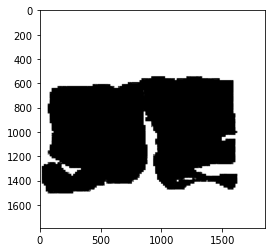

In [50]:
plt.imshow(mask, cmap='gray')

In [51]:
mask

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [6]:
spot_info_df = pd.read_csv(SPATIAL_PATH,sep="\t")

In [13]:
for index, row in spot_info_df.iterrows():
    print(row['pixel_x'], row['pixel_y'])

300.9 634.5
299.0 667.9
301.1 713.5
299.0 752.9
298.7 791.9
299.0 831.9
301.8 871.3
299.2 909.7
299.3 949.6
296.9 989.8
299.7 1028.5
299.8 1067.8
299.8 1107.5
299.8 1146.9
298.3 1187.5
300.3 1225.8
300.6 1264.4
300.7 1304.7
298.1 1343.0
299.7 1379.6
301.1 1422.4
299.0 1462.1
335.1 631.5
338.3 667.6
336.6 709.3
340.4 746.2
336.7 789.1
337.0 827.6
336.9 867.1
334.5 907.0
335.3 949.0
337.1 984.7
338.2 1027.5
336.5 1066.0
339.0 1104.3
338.3 1142.6
340.1 1183.6
340.1 1223.1
339.7 1260.2
339.8 1301.8
340.4 1343.7
340.2 1382.4
342.7 1420.3
342.7 1457.7
374.3 631.2
373.6 671.3
377.3 710.3
376.2 745.8
377.5 789.4
375.7 824.0
376.2 869.2
375.9 905.1
378.2 946.4
377.5 984.7
375.2 1023.8
379.1 1065.5
377.5 1104.4
380.6 1143.0
378.8 1182.7
380.1 1223.5
380.1 1258.1
381.3 1302.9
377.5 1337.5
377.3 1379.1
380.1 1419.1
380.8 1458.8
413.9 633.0
415.9 672.3
415.6 708.2
415.6 746.9
415.6 789.4
415.4 829.3
415.6 866.0
416.8 908.2
413.6 948.3
416.7 987.0
415.6 1024.3
415.6 1064.2
417.3 1105.6
418.4 1143.3
